<a href="https://colab.research.google.com/github/shellayollay/shellayollay.github.io/blob/main/PROJECT_SPK_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasterisasi Pelanggan Menggunakan Metode K-Means untuk Mendukung Pengambilan Keputusan Segmentasi Pasar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload Dataset
print("Silakan upload file dataset (csv):")
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Cek Informasi Data
print("\nInformasi Dataset:")
print(data.info())
print("\nCek Missing Value:")
print(data.isnull().sum())

Silakan upload file dataset (csv):


Saving Mall_Customers.csv to Mall_Customers.csv

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Cek Missing Value:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Pilih Fitur
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X_raw = data[features].values

# Fungsi Scaling
def native_standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

# Terapkan Scaling
X, mean_val, std_val = native_standard_scaler(X_raw)

print("Fitur terpilih:", features)
print("\nStatistik Scaling Manual:")
print(f"Mean: {mean_val}")
print(f"Std Dev: {std_val}")

Fitur terpilih: ['Annual Income (k$)', 'Spending Score (1-100)']

Statistik Scaling Manual:
Mean: [60.56 50.2 ]
Std Dev: [26.19897708 25.75888196]


Menghitung Elbow Method...


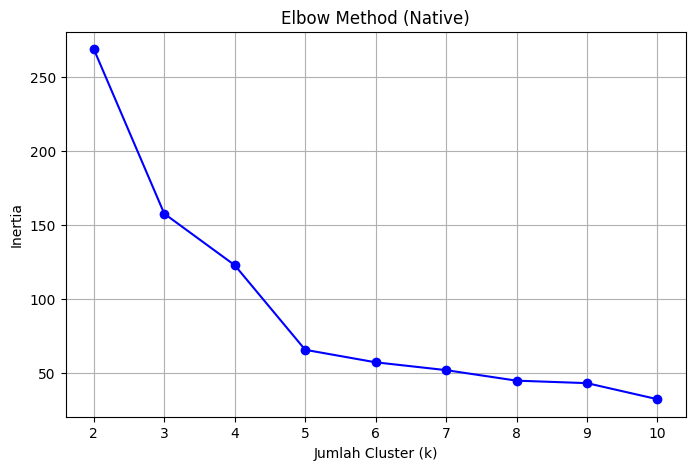

In [ ]:
# Rumus Jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Class K-Means
class NativeKMeans:
    def __init__(self, k=3, max_iters=100, tol=0.0001):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia = 0

    def fit(self, X):
        n_samples = X.shape[0]
        # Inisialisasi Centroid Acak
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Assign Cluster
            self.labels = self._assign_clusters(X)
            # Update Centroid
            new_centroids = self._update_centroids(X)
            # Cek Konvergensi
            if np.sum(np.abs(new_centroids - self.centroids)) < self.tol:
                break
            self.centroids = new_centroids

        self.inertia = self._calculate_inertia(X)

    def _assign_clusters(self, X):
        labels = []
        for point in X:
            distances = [euclidean_distance(point, c) for c in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

    def _update_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points = X[self.labels == i]
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def _calculate_inertia(self, X):
        inertia = 0
        for i, point in enumerate(X):
            inertia += np.sum((point - self.centroids[self.labels[i]])**2)
        return inertia

# Loop Elbow Method
inertia_values = []
K_range = range(2, 11)

print("Menghitung Elbow Method...")
for k in K_range:
    model = NativeKMeans(k=k)
    model.fit(X)
    inertia_values.append(model.inertia)

# Plot Grafik Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o', color='blue')
plt.title("Elbow Method (Native)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Native K-Means dengan k=5...


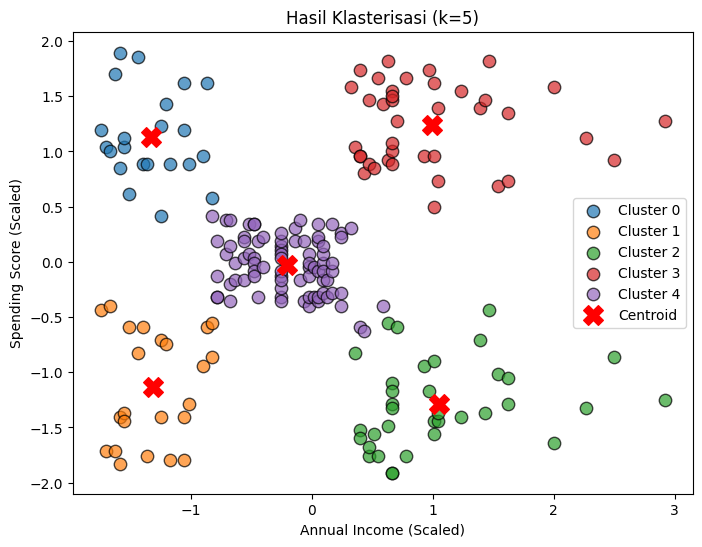

In [ ]:
# Jalankan Model (k=5)
k_optimal = 5
print(f"Native K-Means dengan k={k_optimal}...")

native_model = NativeKMeans(k=k_optimal)
native_model.fit(X)
labels = native_model.labels
centroids = native_model.centroids

# Simpan hasil ke DataFrame
data['Cluster'] = labels

# Visualisasi Scatter Plot
plt.figure(figsize=(8,6))
colors = plt.cm.tab10(np.arange(k_optimal))

# Plot Titik Data
for i in range(k_optimal):
    points = X[labels == i]
    plt.scatter(points[:,0], points[:,1], s=80, color=colors[i],
                label=f'Cluster {i}', alpha=0.7, edgecolors='black')

# Plot Centroid
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X', label='Centroid')
plt.title(f"Hasil Klasterisasi (k={k_optimal})")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.legend()
plt.show()

In [ ]:
# Evaluasi Model
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)

print("EVALUASI MODEL (NATIVE):")
print(f"Silhouette Score    : {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"Calinski-Harabasz   : {ch_score:.4f}")

EVALUASI MODEL (NATIVE):
Silhouette Score    : 0.4625
Davies-Bouldin Index: 0.7722
Calinski-Harabasz   : 148.6912


In [ ]:
# Mengembalikan ke nilai asli (Inverse Scaling)
cluster_summary = pd.DataFrame()
cluster_summary['Cluster'] = sorted(data['Cluster'].unique())

means_income = []
means_spending = []

for i in range(k_optimal):
    # Ambil data point cluster i
    points_scaled = X[labels == i]

    # Rumus balik: (X_scaled * std) + mean
    points_original = (points_scaled * std_val) + mean_val
    mean_original = np.mean(points_original, axis=0)

    means_income.append(round(mean_original[0], 2))
    means_spending.append(round(mean_original[1], 2))

cluster_summary['Rata-rata Income (k$)'] = means_income
cluster_summary['Rata-rata Spending (1-100)'] = means_spending

print("INTERPRETASI PROFIL PELANGGAN:")
print(cluster_summary)

print("\nJumlah Data per Cluster:")
print(data['Cluster'].value_counts().sort_index())

INTERPRETASI PROFIL PELANGGAN:
   Cluster  Rata-rata Income (k$)  Rata-rata Spending (1-100)
0        0                  87.00                       18.63
1        1                  25.73                       79.36
2        2                  78.04                       81.89
3        3                  48.17                       43.40
4        4                 108.18                       82.73

Jumlah Data per Cluster:
Cluster
0     38
1     22
2     28
3    101
4     11
Name: count, dtype: int64
